In [5]:
pip install numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [245]:
## import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualizing data

In [256]:
data = pd.read_csv('housing_prices.csv')

In [257]:
# lets look at top 5 rows of this data
data.head()

,Size (sq ft),Bedrooms,Price ($1000s)
0,1500,3,300
1,1600,3,320
2,1700,3,340
3,1800,4,360
4,1900,4,380


## Linear regression with one independent variable

In [266]:
## defining the training data
X_train = data['Size (sq ft)']
y_train = data['Price ($1000s)']

In [267]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [278]:
## let the model/hypothesis that needed to be found is f = Wx + b, where W and b are parameters
W = 1
b = -2

In [279]:
def model(W, b, x):
    return W*x + b

In [280]:
def loss_cal(W, b, x, y):
    return model(W, b, x) - y

In [281]:
def dw(W, x, b, y):
    return 2*(W * x + b - y)*x

def db(W, x, b, y):
    return 2*(W * x + b - y)

In [282]:
## leraning rate
lr = 1e-7

New W : 0.20106397755752586
New b : -1.9985524304475057


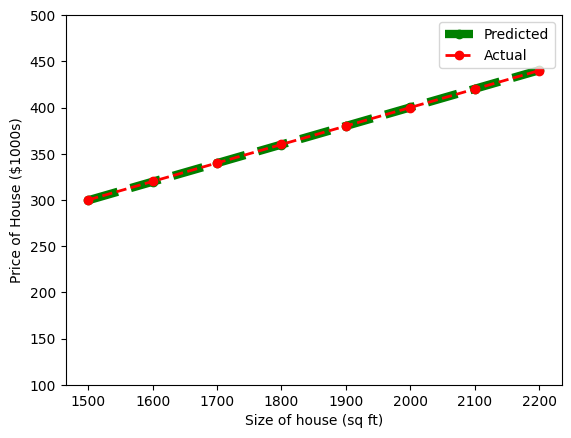

In [286]:
for i in range(100000):
    dW = 0
    dB = 0

    for X, y in zip(X_train, y_train):
        dW += dw(W, X, b, y)
        dB += db(W, X, b, y)

    dW /= len(X_train)
    dB /= len(X_train)

    W -= lr*dW
    b -= lr*dB

print(f"New W : {W}")
print(f"New b : {b}")
    
y_pred = model(W, b, X_train)


# Plot the actual and predicted values
plt.plot(X_train, y_pred, 'go--', linewidth=6, label='Predicted')
plt.plot(X_train, y_train, 'ro--', linewidth=2, label='Actual')
plt.xlabel('Size of house (sq ft)')
plt.ylabel('Price of House ($1000s)')
plt.ylim(100, 500)
plt.legend()
plt.show()